In [1]:
import pandas as pd
import pyspark
import os
from pyspark.sql.functions import countDistinct, count, col, avg, max, min, countDistinct, sum, round, desc
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns



In [2]:
from pyspark.sql import SparkSession

In [3]:
## Initialize the SparkSession
# appName is the name of the application
# getOrCreate() creates a new session or retrieves an existing one
spark = SparkSession.builder \
    .appName("Museh PySpark Learning") \
        .getOrCreate()

## Verify that SparkSession is created
spark

25/05/06 08:01:55 WARN Utils: Your hostname, Zipcoders-MacBook-Pro-5.local resolves to a loopback address: 127.0.0.1; using 192.168.3.155 instead (on interface en0)
25/05/06 08:01:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/06 08:01:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [45]:
try:
    df_listen = spark.read.json ('./Data/listen_events')
    print('Data loaded successfully')
except Exception as e:
    print(f'Error loading data: {e}')

Data loaded successfully


In [5]:
df_listen.show(10)

+--------------------+---------+---------+---------+---------+------+-------------+--------+---------+-----+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|              artist|     auth|     city| duration|firstName|gender|itemInSession|lastName|      lat|level|       lon| registration|sessionId|                song|state|           ts|           userAgent|userId|  zip|
+--------------------+---------+---------+---------+---------+------+-------------+--------+---------+-----+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|John Fred & His P...|Logged In|   Covert|171.80688|     Vera|     F|            2| Stanley|42.285992| paid|-86.268503|1713855719433|     1498|    Judy In Disguise|   MI|1714574635433|Mozilla/5.0 (Wind...|   851|49043|
|    Transvision Vamp|Logged In| Gas City|209.91956|   Landon|     M|           17|  Lucero|40.479845| paid|-85.582288|17142

In [6]:
try:
    df_page = spark.read.json ('./Data/page_view_events')
    print('Data loaded successfully')
except Exception as e:
    print(f'Error loading data: {e}')

df_page.show(30)

Data loaded successfully
+--------------------+----------+------------+---------+---------+------+-------------+--------+---------+-----+----------+------+--------+-------------+---------+--------------------+-----+------+-------------+--------------------+------+-----+
|              artist|      auth|        city| duration|firstName|gender|itemInSession|lastName|      lat|level|       lon|method|    page| registration|sessionId|                song|state|status|           ts|           userAgent|userId|  zip|
+--------------------+----------+------------+---------+---------+------+-------------+--------+---------+-----+----------+------+--------+-------------+---------+--------------------+-----+------+-------------+--------------------+------+-----+
|John Fred & His P...| Logged In|      Covert|171.80688|     Vera|     F|            2| Stanley|42.285992| paid|-86.268503|   PUT|NextSong|1713855719433|     1498|    Judy In Disguise|   MI|   200|1714574635433|Mozilla/5.0 (Wind...|   85

In [7]:
try:
    df_status = spark.read.json ('./Data/status_change_events')
    print('Data loaded successfully')
except Exception as e:
    print(f'Error loading data: {e}')

df_status.show(30)

Data loaded successfully
+---------+-------------------+---------+------+-------------+---------+---------+-----+-----------+-------------+---------+-----+-------------+--------------------+------+-----+
|     auth|               city|firstName|gender|itemInSession| lastName|      lat|level|        lon| registration|sessionId|state|           ts|           userAgent|userId|  zip|
+---------+-------------------+---------+------+-------------+---------+---------+-----+-----------+-------------+---------+-----+-------------+--------------------+------+-----+
|Logged In|       Conshohocken|    Kezia|     F|            5|   Fowler|40.080337| paid| -75.300461|1714382893433|     1702|   PA|1714577869433|Mozilla/5.0 (Maci...|   813|19428|
|Logged In|          Las Vegas|     Jace|     M|            3|  Patrick|36.111833| free|-115.211676|1714224142433|     1326|   NV|1714581991433|"Mozilla/5.0 (X11...|   691|89103|
|Logged In|          Milwaukee|  Zachary|     M|            3| Gonzalez|43.04900

In [8]:
try:
    df_auth = spark.read.json ('./Data/auth_events')
    print('Data loaded successfully')
except Exception as e:
    print(f'Error loading data: {e}')

df_auth.show(10)

Data loaded successfully
+----------------+---------+------+-------------+--------+---------+-----+-----------+-------------+---------+-----+-------+-------------+--------------------+------+-----+
|            city|firstName|gender|itemInSession|lastName|      lat|level|        lon| registration|sessionId|state|success|           ts|           userAgent|userId|  zip|
+----------------+---------+------+-------------+--------+---------+-----+-----------+-------------+---------+-----+-------+-------------+--------------------+------+-----+
|    Philadelphia|      Mia|     F|            1|Thompson|40.096485| paid| -74.983219|1713838246433|     1257|   PA|   true|1714575065433|Mozilla/5.0 (Wind...|   782|19154|
|       Owensboro| Anakaren|     F|           16|Crawford|37.735778| paid| -87.249397|1714087326433|     1886|   KY|   true|1714577211433|"Mozilla/5.0 (Win...|   278|42301|
|      New London|     NULL|  NULL|            1|    NULL|39.579374| free| -91.369252|         NULL|      319|

In [9]:
df_auth.printSchema()

root
 |-- city: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- level: string (nullable = true)
 |-- lon: double (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- state: string (nullable = true)
 |-- success: boolean (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: long (nullable = true)
 |-- zip: string (nullable = true)



In [10]:
df_listen.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- city: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- level: string (nullable = true)
 |-- lon: double (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- state: string (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: long (nullable = true)
 |-- zip: string (nullable = true)



In [11]:
df_page.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- city: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- level: string (nullable = true)
 |-- lon: double (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- state: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: long (nullable = true)
 |-- zip: string (nullable = true)



In [12]:
df_status.printSchema()

root
 |-- auth: string (nullable = true)
 |-- city: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- level: string (nullable = true)
 |-- lon: double (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- state: string (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: long (nullable = true)
 |-- zip: string (nullable = true)



# Starting cleaning

In [13]:
auth_cleaned = df_auth
auth_cleaned.show()

+----------------+---------+------+-------------+--------+---------+-----+-----------+-------------+---------+-----+-------+-------------+--------------------+------+-----+
|            city|firstName|gender|itemInSession|lastName|      lat|level|        lon| registration|sessionId|state|success|           ts|           userAgent|userId|  zip|
+----------------+---------+------+-------------+--------+---------+-----+-----------+-------------+---------+-----+-------+-------------+--------------------+------+-----+
|    Philadelphia|      Mia|     F|            1|Thompson|40.096485| paid| -74.983219|1713838246433|     1257|   PA|   true|1714575065433|Mozilla/5.0 (Wind...|   782|19154|
|       Owensboro| Anakaren|     F|           16|Crawford|37.735778| paid| -87.249397|1714087326433|     1886|   KY|   true|1714577211433|"Mozilla/5.0 (Win...|   278|42301|
|      New London|     NULL|  NULL|            1|    NULL|39.579374| free| -91.369252|         NULL|      319|   MO|  false|17145772844

In [14]:
auth_cleaned = auth_cleaned.select('userId','lastName','firstName', 'gender','city','state','zip', 'lat','lon', \
                                   'level', 'sessionId','itemInSession', 'registration', 'success', 'userAgent', 'ts')
auth_cleaned.show()

+------+--------+---------+------+----------------+-----+-----+---------+-----------+-----+---------+-------------+-------------+-------+--------------------+-------------+
|userId|lastName|firstName|gender|            city|state|  zip|      lat|        lon|level|sessionId|itemInSession| registration|success|           userAgent|           ts|
+------+--------+---------+------+----------------+-----+-----+---------+-----------+-----+---------+-------------+-------------+-------+--------------------+-------------+
|   782|Thompson|      Mia|     F|    Philadelphia|   PA|19154|40.096485| -74.983219| paid|     1257|            1|1713838246433|   true|Mozilla/5.0 (Wind...|1714575065433|
|   278|Crawford| Anakaren|     F|       Owensboro|   KY|42301|37.735778| -87.249397| paid|     1886|           16|1714087326433|   true|"Mozilla/5.0 (Win...|1714577211433|
|  NULL|    NULL|     NULL|  NULL|      New London|   MO|63459|39.579374| -91.369252| free|      319|            1|         NULL|  fals

In [46]:
auth_cleaned.filter(auth_cleaned['userId'].isNull()).show()

+------+--------+---------+------+----------------+-----+-----+---------+-----------+-----------+---------+-------------+------------+-------+--------------------+-------------+
|userId|lastName|firstName|gender|            city|state|  zip|      lat|        lon|subcription|sessionId|itemInSession|registration|success|           userAgent|           ts|
+------+--------+---------+------+----------------+-----+-----+---------+-----------+-----------+---------+-------------+------------+-------+--------------------+-------------+
|  NULL|    NULL|     NULL|  NULL|      New London|   MO|63459|39.579374| -91.369252|       free|      319|            1|        NULL|  false|"Mozilla/5.0 (Win...|1714577284433|
|  NULL|    NULL|     NULL|  NULL|            Erie|   PA|16511|42.166262|  -79.99017|       free|      499|            2|        NULL|  false|"Mozilla/5.0 (Mac...|1714578974433|
|  NULL|    NULL|     NULL|  NULL|            Erie|   PA|16511|42.166262|  -79.99017|       free|      499|   

In [16]:
# filtering out rows where userid is null
auth_cleaned2 = auth_cleaned.filter(auth_cleaned['userId'].isNotNull())

In [17]:
auth_cleaned2.select('success').distinct().show()

+-------+
|success|
+-------+
|   true|
+-------+



In [18]:
auth_cleaned.filter(auth_cleaned['level'].isNull() & auth_cleaned['userId'].isNotNull()).show()

+------+--------+---------+------+----+-----+---+---+---+-----+---------+-------------+------------+-------+---------+---+
|userId|lastName|firstName|gender|city|state|zip|lat|lon|level|sessionId|itemInSession|registration|success|userAgent| ts|
+------+--------+---------+------+----+-----+---+---+---+-----+---------+-------------+------------+-------+---------+---+
+------+--------+---------+------+----+-----+---+---+---+-----+---------+-------------+------------+-------+---------+---+



In [19]:
auth_cleaned = auth_cleaned.withColumnRenamed('level','subcription')

In [20]:
auth_cleaned.show()

+------+--------+---------+------+----------------+-----+-----+---------+-----------+-----------+---------+-------------+-------------+-------+--------------------+-------------+
|userId|lastName|firstName|gender|            city|state|  zip|      lat|        lon|subcription|sessionId|itemInSession| registration|success|           userAgent|           ts|
+------+--------+---------+------+----------------+-----+-----+---------+-----------+-----------+---------+-------------+-------------+-------+--------------------+-------------+
|   782|Thompson|      Mia|     F|    Philadelphia|   PA|19154|40.096485| -74.983219|       paid|     1257|            1|1713838246433|   true|Mozilla/5.0 (Wind...|1714575065433|
|   278|Crawford| Anakaren|     F|       Owensboro|   KY|42301|37.735778| -87.249397|       paid|     1886|           16|1714087326433|   true|"Mozilla/5.0 (Win...|1714577211433|
|  NULL|    NULL|     NULL|  NULL|      New London|   MO|63459|39.579374| -91.369252|       free|      31

In [21]:
auth_cleaned.where(auth_cleaned['userId'] == '916').show()

+------+--------+---------+------+---------+-----+-----+---------+----------+-----------+---------+-------------+-------------+-------+--------------------+-------------+
|userId|lastName|firstName|gender|     city|state|  zip|      lat|       lon|subcription|sessionId|itemInSession| registration|success|           userAgent|           ts|
+------+--------+---------+------+---------+-----+-----+---------+----------+-----------+---------+-------------+-------------+-------+--------------------+-------------+
|   916| Jimenez|      Mia|     F|Rochester|   MI|48306|42.724318|-83.147306|       paid|     4845|           29|1714366937433|   true|"Mozilla/5.0 (Win...|1715661576433|
|   916| Jimenez|      Mia|     F|Rochester|   MI|48306|42.724318|-83.147306|       paid|     5716|            2|1714366937433|   true|"Mozilla/5.0 (Win...|1715694315433|
|   916| Jimenez|      Mia|     F|Rochester|   MI|48306|42.724318|-83.147306|       paid|     7006|            1|1714366937433|   true|"Mozilla/5

In [22]:

auth_cleaned.select(countDistinct('userId')).show()

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                   902|
+----------------------+



## Starting my analysis

In [23]:
artist_page_df = df_listen
artist_page_df.show()

+--------------------+---------+-----------+---------+---------+------+-------------+--------+---------+-----+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|              artist|     auth|       city| duration|firstName|gender|itemInSession|lastName|      lat|level|       lon| registration|sessionId|                song|state|           ts|           userAgent|userId|  zip|
+--------------------+---------+-----------+---------+---------+------+-------------+--------+---------+-----+----------+-------------+---------+--------------------+-----+-------------+--------------------+------+-----+
|John Fred & His P...|Logged In|     Covert|171.80688|     Vera|     F|            2| Stanley|42.285992| paid|-86.268503|1713855719433|     1498|    Judy In Disguise|   MI|1714574635433|Mozilla/5.0 (Wind...|   851|49043|
|    Transvision Vamp|Logged In|   Gas City|209.91956|   Landon|     M|           17|  Lucero|40.479845| paid|-85.58

In [24]:
artist_page_df = artist_page_df.selectExpr('userId', 'lastName', 'firstName', 'gender', 'song', 'artist', 'duration', 'sessionId', 'itemInSession', 'auth', 'level as subcription', 'city', 'state', 'zip', 'lat', 'lon', 'registration', 'userAgent', 'ts')
artist_page_df.show(5)

+------+--------+---------+------+--------------------+--------------------+---------+---------+-------------+---------+-----------+---------+-----+-----+---------+----------+-------------+--------------------+-------------+
|userId|lastName|firstName|gender|                song|              artist| duration|sessionId|itemInSession|     auth|subcription|     city|state|  zip|      lat|       lon| registration|           userAgent|           ts|
+------+--------+---------+------+--------------------+--------------------+---------+---------+-------------+---------+-----------+---------+-----+-----+---------+----------+-------------+--------------------+-------------+
|   851| Stanley|     Vera|     F|    Judy In Disguise|John Fred & His P...|171.80688|     1498|            2|Logged In|       paid|   Covert|   MI|49043|42.285992|-86.268503|1713855719433|Mozilla/5.0 (Wind...|1714574635433|
|    24|  Lucero|   Landon|     M|    I Want Your Love|    Transvision Vamp|209.91956|       23|    

In [25]:
type(artist_page_df)

pyspark.sql.dataframe.DataFrame

## Methods

In [26]:
import pyspark


def get_artist_state_listen(df: pyspark.sql.dataframe.DataFrame , artist: str) -> pyspark.sql.dataframe.DataFrame:
    '''
    Filters and aggregates a pyspark dataframe to count listens by artist and state

    Args:
        df (pyspark.sql.dataframe.DataFrame): dataframe
        artist (str): name of the artist

    Returns:
        filtered and aggregated dataframe 
    
    '''
    df = df.groupBy('artist','state').agg(count('*').alias('listens')).where(col('artist') == artist).orderBy(desc('listens'))
    return df

In [27]:
def get_arist_over_1000(df: pyspark.sql.dataframe.DataFrame, number_of_lis) -> list:
    '''
    Takes in a pyspark dataframe and returns list of artists with at least a states number of listens

    Args:
        df (pyspark.sql.dataframe.DataFrame): dataframe
        number_of_lis (int): min number of listens

    Returns:
        list: number of artists with at least the specified number of listens

    '''
    df = df.groupBy('artist').agg(count('*').alias('listens')).filter(col('listens') >= number_of_lis)
    df_list = [data[0] for data in df.select('artist').collect()]
    return df_list

In [74]:
def map_prep_df(df: pyspark.sql.dataframe.DataFrame) -> pd.core.frame.DataFrame:
    '''
    Takes a filtered pyspark dataframe and returns a pandas dataframe with state names 

    Arg:
        df (pyspark.sql.dataframe.DataFrame): dataframe

    Returns:
        pandas dataframe: dataframe of artist, # of listens, US states: name & abr

    '''
    us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA",
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
    "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC",
    }
    
    us_states = list(us_state_to_abbrev.items())
    us_states_columns = ['NAME', 'state']  # <-- make sure this matches
    states_df = pd.DataFrame(us_states, columns=us_states_columns)

    df = df.toPandas()
    artist = df.artist[0]

    map_prep = pd.merge(
    left = df,
    right = states_df,
    left_on = 'state',
    right_on ='state',
    how = 'right')

    map_prep.listens = map_prep.listens.fillna(0)
    map_prep.artist = map_prep.artist.fillna(artist)
    
    return map_prep


 

In [29]:
def make_map_df(pdf: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    '''
    Takes in a filtered pandas dataframe merge with state shape data from the census to creates dataframe needed to build heatmap

    Arg:
        pdf (pd.core.frame.DataFrame): dataframe

    Returns:
        pandas dataframe: the dataframe with but
    '''

    # getting shape data, downloaded from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
    shape_path = './data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
    shape = gpd.read_file(shape_path)

    # left join the dataframes
    map_data = pd.merge(
    left = shape,
    right = pdf,
    left_on = 'NAME',
    right_on ='NAME',
    how = 'left')

    return map_data


In [80]:
def top_5(df: pyspark.sql.dataframe.DataFrame) ->  pyspark.sql.dataframe.DataFrame:
    df = df.orderBy(desc('listens')).limit(5)
    return df

In [31]:
c = get_artist_state_listen(artist_page_df, 'Aerosmith')
c.show()

+---------+-----+-------+
|   artist|state|listens|
+---------+-----+-------+
|Aerosmith|   CA|    229|
|Aerosmith|   TX|    110|
|Aerosmith|   NY|     97|
|Aerosmith|   FL|     92|
|Aerosmith|   MI|     81|
|Aerosmith|   OH|     73|
|Aerosmith|   VA|     48|
|Aerosmith|   IL|     46|
|Aerosmith|   NC|     43|
|Aerosmith|   NJ|     40|
|Aerosmith|   PA|     38|
|Aerosmith|   MA|     35|
|Aerosmith|   TN|     34|
|Aerosmith|   GA|     34|
|Aerosmith|   OR|     34|
|Aerosmith|   MD|     34|
|Aerosmith|   SC|     30|
|Aerosmith|   KY|     29|
|Aerosmith|   WI|     26|
|Aerosmith|   RI|     26|
+---------+-----+-------+
only showing top 20 rows



In [ ]:
ss = top_5(c)
ss.show()

+---------+-----+-------+
|   artist|state|listens|
+---------+-----+-------+
|Aerosmith|   CA|    229|
|Aerosmith|   TX|    110|
|Aerosmith|   NY|     97|
|Aerosmith|   FL|     92|
|Aerosmith|   MI|     81|
+---------+-----+-------+



25/05/06 10:51:56 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 904967 ms exceeds timeout 120000 ms
25/05/06 10:51:56 WARN SparkContext: Killing executors is not supported by current scheduler.
25/05/06 11:09:24 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

In [77]:
cc = map_prep_df(c)
cc

,artist,state,listens,NAME
0,Aerosmith,AL,11.0,Alabama
1,Aerosmith,AK,4.0,Alaska
2,Aerosmith,AZ,24.0,Arizona
3,Aerosmith,AR,22.0,Arkansas
4,Aerosmith,CA,229.0,California
5,Aerosmith,CO,22.0,Colorado
6,Aerosmith,CT,8.0,Connecticut
7,Aerosmith,DE,3.0,Delaware
8,Aerosmith,FL,92.0,Florida
9,Aerosmith,GA,34.0,Georgia


In [76]:
dd = make_map_df(cc)
dd.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,artist,state,listens
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",Aerosmith,MS,10.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",Aerosmith,NC,43.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",Aerosmith,OK,9.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Aerosmith,VA,48.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",Aerosmith,WV,2.0


In [34]:
d = get_arist_over_1000(artist_page_df, 1000)
len(d)

154

In [35]:
artist_page_df.select('artist').distinct().count()

26667

In [36]:
# grouping plays by both artists and states
artist_page_df.groupBy('artist','state').agg(count('*').alias('listens')).orderBy(desc('artist')).show()

+-----------------+-----+-------+
|           artist|state|listens|
+-----------------+-----+-------+
|           ÃÂ¼NN|   CA|      1|
|           ÃÂ¼NN|   AZ|      1|
|   ÃÂzlem Tekin|   TX|      1|
|   ÃÂzlem Tekin|   CA|      1|
|   ÃÂzlem Tekin|   NC|      1|
|   ÃÂrla Fallon|   CA|      2|
|   ÃÂrla Fallon|   FL|      1|
|ÃÂlafur Arnalds|   MO|      2|
|ÃÂlafur Arnalds|   VA|      5|
|ÃÂlafur Arnalds|   GA|      3|
|ÃÂlafur Arnalds|   WI|      5|
|ÃÂlafur Arnalds|   TX|      8|
|ÃÂlafur Arnalds|   WA|      5|
|ÃÂlafur Arnalds|   MI|      4|
|ÃÂlafur Arnalds|   OH|      9|
|ÃÂlafur Arnalds|   PA|      5|
|ÃÂlafur Arnalds|   ID|      2|
|ÃÂlafur Arnalds|   CA|     23|
|ÃÂlafur Arnalds|   RI|      1|
|ÃÂlafur Arnalds|   MD|      3|
+-----------------+-----+-------+
only showing top 20 rows



In [54]:

state = 'IN'
areo = artist_page_df.groupBy('artist','state').agg(count('*').alias('listens')).where(col('artist') == 'Aerosmith').orderBy(desc('listens'))
areo.show(5)

+---------+-----+-------+
|   artist|state|listens|
+---------+-----+-------+
|Aerosmith|   CA|    229|
|Aerosmith|   TX|    110|
|Aerosmith|   NY|     97|
|Aerosmith|   FL|     92|
|Aerosmith|   MI|     81|
+---------+-----+-------+
only showing top 5 rows



In [38]:
d = artist_page_df.groupBy('artist').agg(count('*').alias('listens')).filter(col('listens') >= 1000)
d.show()

+--------------------+-------+
|              artist|listens|
+--------------------+-------+
|      The Black Keys|   5828|
|          Nickelback|   2787|
|          Lily Allen|   3213|
|             Phoenix|   1938|
|           Lifehouse|   1557|
|Barry Tuckwell/Ac...|   3156|
|                  U2|   1299|
|        Taylor Swift|   4309|
|         Fleet Foxes|   1038|
|             Rihanna|   2914|
|Jason Mraz & Colb...|   1049|
|         Arcade Fire|   1325|
|             Incubus|   1510|
|            Natiruts|   1083|
|          Ron Carter|   1350|
|     Crystal Castles|   1192|
|          Kanye West|   3081|
|         Linkin Park|   4017|
|             Cartola|   2285|
|            Coldplay|   9318|
+--------------------+-------+
only showing top 20 rows



In [39]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI"
}

us_states = list(us_state_to_abbrev.items())
us_states_columns = ['state', 'state_abbr']  # <-- make sure this matches

state_df = spark.createDataFrame(us_states, us_states_columns)

In [40]:
df = pd.DataFrame(us_states, columns=us_states_columns)
df.head()

,state,state_abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
areo2 = areo.toPandas()
areo2.head()

,artist,state,listens
0,Aerosmith,CA,229
1,Aerosmith,TX,110
2,Aerosmith,NY,97
3,Aerosmith,FL,92
4,Aerosmith,MI,81


In [48]:
shape_for_graph = pd.merge(
    left = areo2,
    right = df,
    left_on = 'state',
    right_on ='state_abbr',
    how = 'right'
)
shape_for_graph.head()

,artist,state_x,listens,state_y,state_abbr
0,Aerosmith,AL,11.0,Alabama,AL
1,Aerosmith,AK,4.0,Alaska,AK
2,Aerosmith,AZ,24.0,Arizona,AZ
3,Aerosmith,AR,22.0,Arkansas,AR
4,Aerosmith,CA,229.0,California,CA


In [51]:
shape_for_graph.head()

,artist,state_x,listens,state_y,state_abbr
0,Aerosmith,AL,11.0,Alabama,AL
1,Aerosmith,AK,4.0,Alaska,AK
2,Aerosmith,AZ,24.0,Arizona,AZ
3,Aerosmith,AR,22.0,Arkansas,AR
4,Aerosmith,CA,229.0,California,CA


In [53]:
shape_map = shape_for_graph.drop('state_abbr', axis=1)
shape_map.head()

,artist,state_x,listens,state_y
0,Aerosmith,AL,11.0,Alabama
1,Aerosmith,AK,4.0,Alaska
2,Aerosmith,AZ,24.0,Arizona
3,Aerosmith,AR,22.0,Arkansas
4,Aerosmith,CA,229.0,California


In [ ]:
# getting shape data, downloaded from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
shape_path = './data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
shape = gpd.read_file(shape_path)
print(shape.columns)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [ ]:
shape.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [ ]:
# left join the dataframes
map_data = pd.merge(
    left = shape,
    right = shape_map,
    left_on = 'NAME',
    right_on ='state_y',
    how = 'left'
)


In [ ]:
map_data.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'artist', 'state_x', 'listens',
       'state_y'],
      dtype='object')

In [ ]:
map_data2 = map_data.dropna()

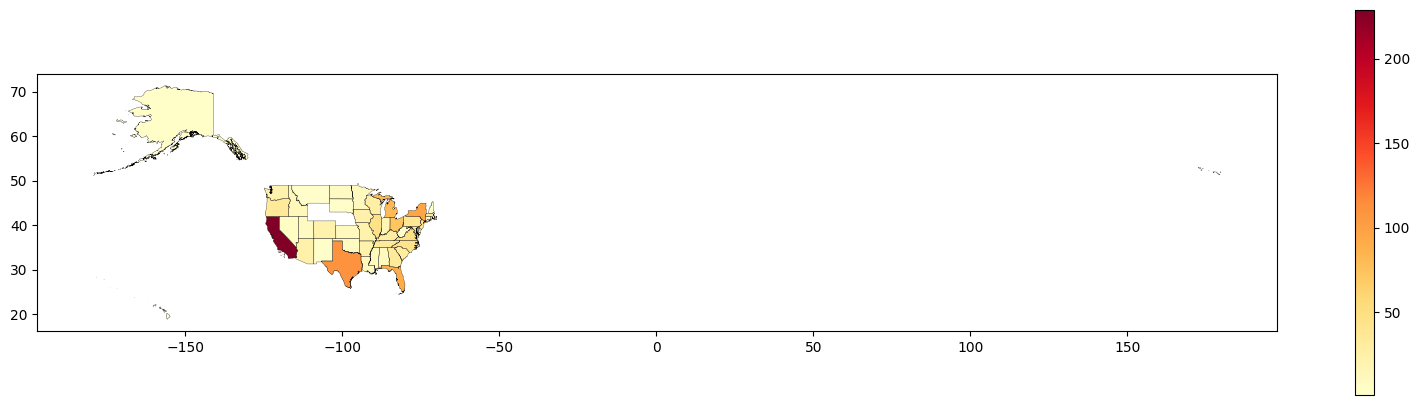

In [ ]:
ax = map_data2.boundary.plot(edgecolor ='black', linewidth=0.2, figsize=(20,5))
map_data2.plot(ax=ax, column="listens", legend=True, cmap='YlOrRd')
plt.show()

In [ ]:

from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from shapely.geometry import Polygon
import missingno as msno
import os
import wget
import openpyxl
import math


<Axes: >

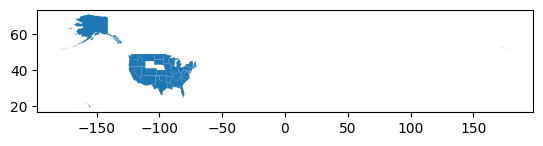

In [ ]:
map_data2.plot()

In [ ]:
alaska_gdf = map_data2[map_data2.state_x == 'AK']
hawaii_gdf = map_data2[map_data2.state_x == 'HI']

<Axes: >

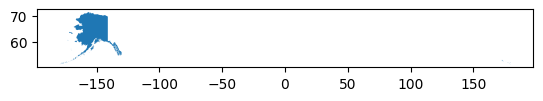

In [ ]:
alaska_gdf.plot()

<Axes: >

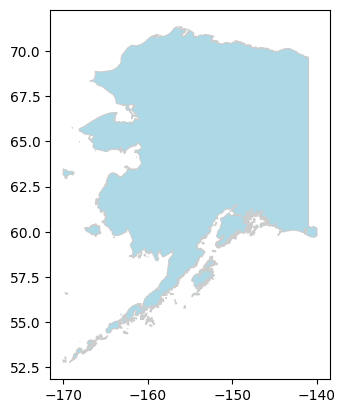

In [ ]:

polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
# apply1(alaska_gdf,0,36)
alaska_gdf.clip(polygon).plot( color='lightblue', linewidth=0.8, edgecolor='0.8')
# alaska_gdf.clip(polygon).plot(column=variable, cmap = colormap, linewidth=0.8,ax=akax, edgecolor='0.8')

<Axes: >

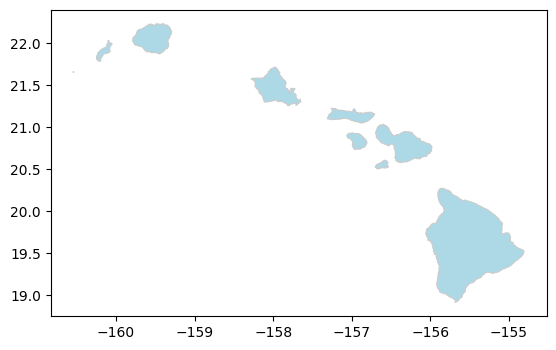

In [ ]:

hipolygon = Polygon([(-161,0),(-161,90),(-120,90),(-120,0)])
hawaii_gdf.clip(hipolygon).plot(color='lightblue', linewidth=0.8, edgecolor='0.8')

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


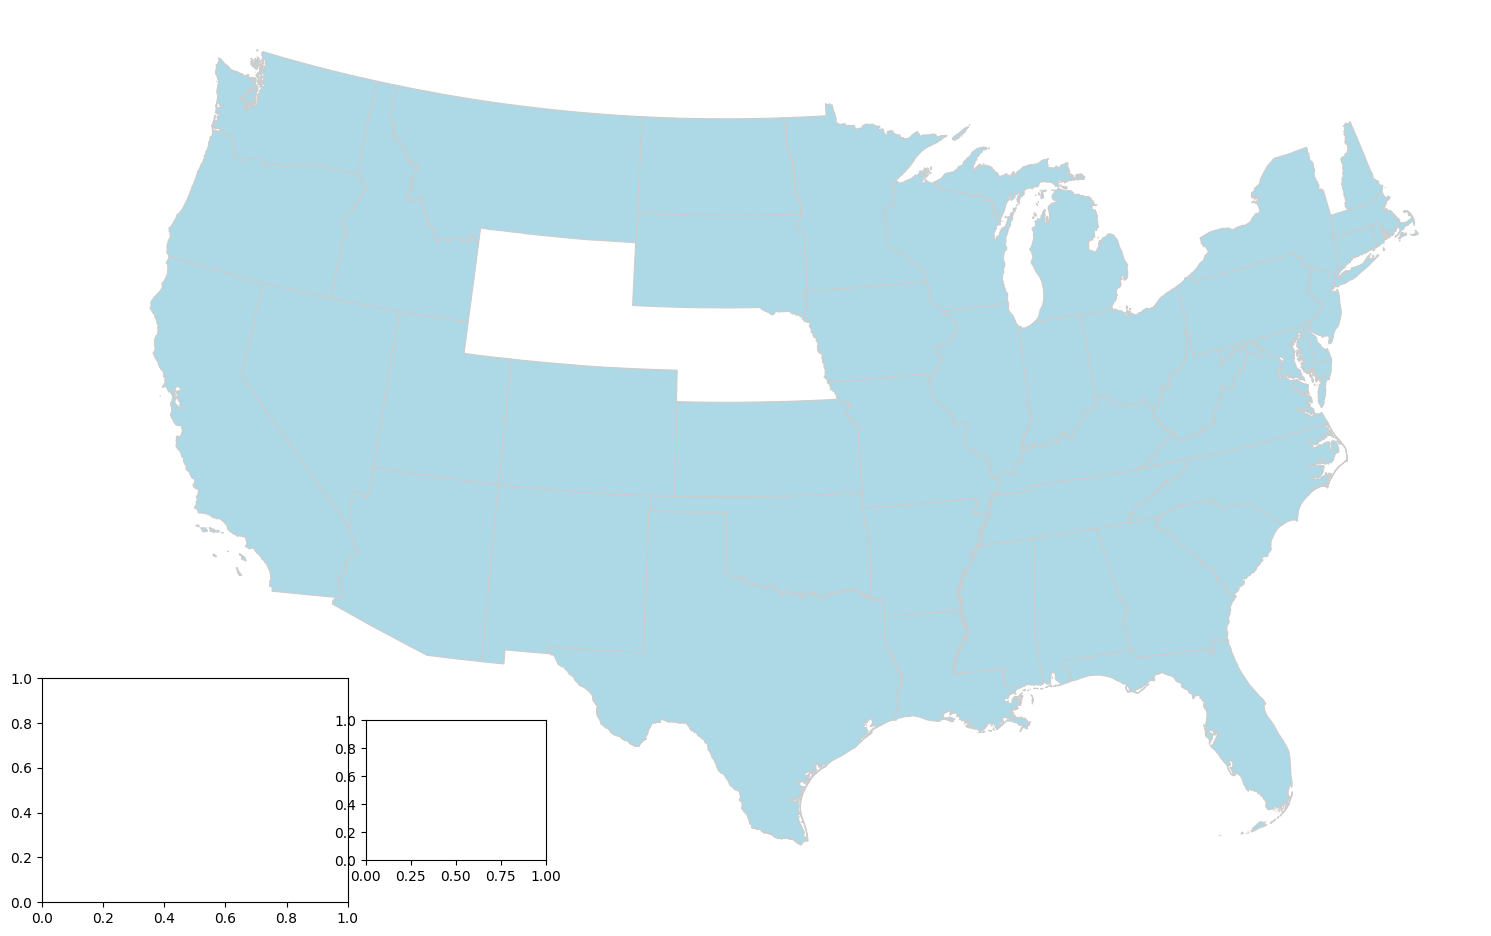

In [ ]:
# Create a "copy" of gdf for re-projecting
visframe = map_data2.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')


# create map of all states except AK and HI in the main map axis
visframe[~visframe.state_x.isin(['HI','AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   


# Add Hawaii Axis(x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   

# We'll later map Alaska in "akax" and Hawaii in "hiax"


In [ ]:
# Apply this the gdf to ensure that all states are assigned colors by the same function
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

In [ ]:
# **************************
# set the value column that will be visualised
variable = 'listens'
performer = map_data21.artist[0]  

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = map_data2.listens.min(), map_data2.listens.max() #math.ceil(gdf.pct_food_insecure.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlOrBr"
map_data21 = makeColorColumn(map_data2,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163

# In the context of Geopandas, EPSG:2163 refers to a Coordinate Reference System (CRS) 
# for the US National Atlas Equal Area projection. It's specifically designed for statistical 
# analysis and mapping of the United States, both onshore and offshore
visframe = map_data21.to_crs({'init':'epsg:2163'})



# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# set the font for the visualization to Helvetica
hfont = {'fontname':'Helvetica'}

# add a title and annotation
ax.set_title(f'Listens for {performer}\n2024-2025', **hfont, fontdict={'fontsize': '42', 'fontweight' : '1'})


# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Number of listens\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))

# reformat tick labels on legend
sm._A = []

fig.colorbar(sm, cax=cbax)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.annotate("Data: USDA Economic Research Service, accessed 15 Jan 23\nhttps://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/#map", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.state_x not in ['AK','HI']:
        vf = visframe[visframe.state_x==row.state_x]
        c = map_data21[map_data21.state_x==row.state_x][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')




# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = map_data21[map_data21.state_x=='AK']
alaska_gdf.clip(polygon).plot(color=map_data21[map_data21.state_x=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = map_data21[map_data21.state_x=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')



#fig.savefig(os.getcwd()+'/food_insecurity_by_state_2019_2021.png',dpi=400, bbox_inches="tight")
# bbox_inches="tight" keeps the vis from getting cut off at the edges in the saved png
# dip is "dots per inch" and controls image quality.  Many scientific journals have specifications for this
# https://stackoverflow.com/questions/16183462/saving-images-in-python-at-a-very-high-quality


NameError: name 'map_data21' is not defined

In [79]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=cc.state, # Spatial coordinates
    z = cc.listens, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "listens",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()
